<a href="https://colab.research.google.com/github/MendyAr/Assignment2_spl/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
df_train = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_train.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# data cleaning

## utilities

In [6]:
def fill_median(df, column):
  median_value = df[column].median()
  df[column].fillna(median_value, inplace=True)

def fill_mean(df, column):
  mean_value = df[column].mean()
  df[column].fillna(mean_value, inplace=True)

def reduce_outline(df, column, min, max):
  df[column] = df[column].apply(lambda x: min if x < min else (max if x > max else x))

def reduce_to_bins(df, column, bins):
  labels = list(range(len(bins)-1))
  df[column] = pd.cut(df[column], bins=bins, labels=labels, right=True, include_lowest=True)

def display_distribution(df, column):
  sns.distplot(df[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')
  plt.show()

## cleaning

In [7]:
df_train.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
original_diabetic_df = df_train[df_train['Diabetes_binary'] == 1]
diabetic_df = original_diabetic_df.copy()
print(diabetic_df.head())

       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
35346              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
35347              1.0     0.0       0.0        1.0  25.0     1.0     0.0   
35348              1.0     1.0       1.0        1.0  28.0     0.0     0.0   
35349              1.0     0.0       0.0        1.0  23.0     1.0     0.0   
35350              1.0     1.0       0.0        1.0  27.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
35346                   1.0           0.0     1.0  ...            1.0   
35347                   0.0           1.0     1.0  ...            1.0   
35348                   0.0           0.0     0.0  ...            1.0   
35349                   0.0           1.0     0.0  ...            1.0   
35350                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
35346          0.0      5.

In [9]:
none_diabetic_df = df_train[df_train['Diabetes_binary'] == 0]
print(none_diabetic_df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

In [10]:
reduce_to_bins(diabetic_df, 'BMI', [0, 18.5, 25, 30, float('inf')])
reduce_to_bins(diabetic_df, 'MentHlth', [0, 10, 20, 30])
reduce_to_bins(diabetic_df, 'PhysHlth', [0, 10, 20, 30])
reduce_to_bins(diabetic_df, 'Age', [1, 9, 13])

In [11]:
diabetic_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# model training

In [12]:
# Define your features and target variable
X = diabetic_df.drop('HeartDiseaseorAttack', axis=1)  # Features (all columns except 'HeartDiseaseorAttack')
y = diabetic_df['HeartDiseaseorAttack']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10, n_estimators=100)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more detailed performance analysis
report = classification_report(y_test, y_pred)
print(report)



# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Accuracy: 78.51%
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      5472
         1.0       0.62      0.13      0.21      1598

    accuracy                           0.79      7070
   macro avg       0.71      0.55      0.54      7070
weighted avg       0.75      0.79      0.73      7070

Feature ranking:
1. feature 6 (0.17611418920540875)
2. feature 13 (0.17393275443476666)
3. feature 16 (0.08059742827002196)
4. feature 18 (0.07985581716169451)
5. feature 17 (0.0691269818698515)
6. feature 20 (0.05998122642839094)
7. feature 15 (0.05379520243912181)
8. feature 19 (0.044278946458131074)
9. feature 5 (0.043204139623132375)
10. feature 2 (0.03811545070263577)
11. feature 1 (0.03762115306564577)
12. feature 4 (0.03174506664215373)
13. feature 14 (0.02356568604408085)
14. feature 7 (0.01798836853662395)
15. feature 8 (0.01613297845835604)
16. feature 9 (0.015610143663136532)
17. feature 12 (0.014615858101523884)
18. feature 11 (0.010413

# data analazis

## utilities

In [13]:
def risk_func(input, feature):
  # Define the range of values for the feature
  min_value = int(X_train[feature].min())
  max_value = round(X_train[feature].max())
  print(min_value, max_value)
  inpute = input.copy()

  # Create random input data with the specified feature varying
  plt.figure(figsize=(5, 5))
  for val in range(min_value, max_value+1):
    inpute[feature] = val
    predicted_probabilities = clf.predict_proba([inpute])[0][1]
    plt.plot(inpute[feature], predicted_probabilities, marker='o', linestyle='-', color='b')

  plt.xlabel(feature)
  plt.ylabel("CHD Probability")
  plt.title(f"Predictability vs. {feature}")
  plt.grid(True)
  plt.show()

## sample analyzes

0 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


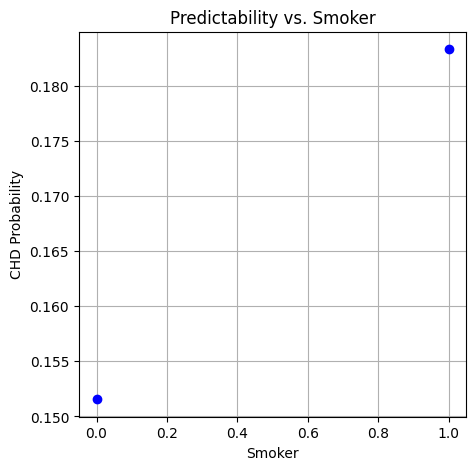

In [14]:
risk_func(X_test.iloc[8], 'Smoker')

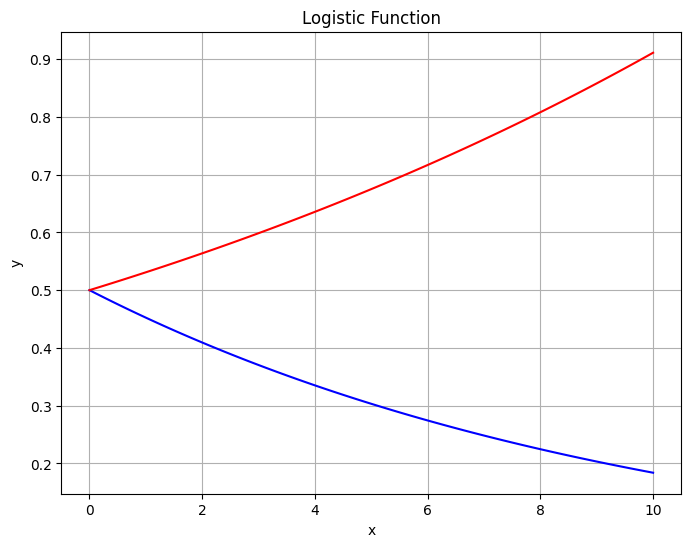

In [18]:
# Define the parameters
A = 0.5  # Initial value
k = 0.1  # Decay constant (adjust as needed)
C = 0    # Constant (asymptotic value)

# Generate x values
x = np.linspace(0, 10, 100)  # Adjust the range and number of points as needed

# Calculate y values using the exponential decay equation
y = A * np.exp(-k * x) + C

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', linestyle='-', marker='', label='Decay Curve')

# Calculate y values using the exponential decay equation
A = 0.5   # Initial value
k = -0.06  # Decay constant (adjust as needed)
C = 0     # Constant (asymptotic value)
y = A * np.exp(-k * x) + C

# Create the plot
plt.plot(x, y, color='red', linestyle='-', marker='', label='Decay Curve')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic Function")
plt.grid(True)
plt.show()
